In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Pokemon.csv")
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
data['Type 2'].fillna(value='None',inplace=True)
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


<AxesSubplot:>

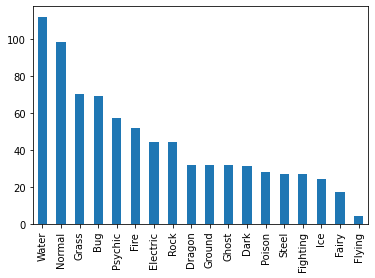

In [4]:
data['Type 1'].value_counts().plot.bar()

<AxesSubplot:>

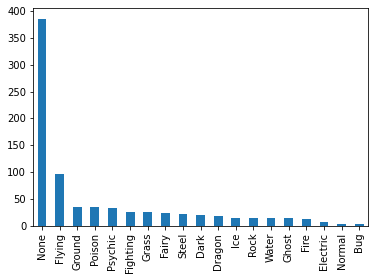

In [5]:
data['Type 2'].value_counts().plot.bar()

735 65


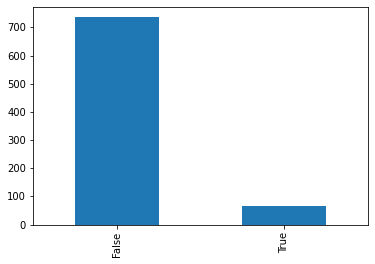

In [6]:
data['Legendary'].value_counts().plot.bar()
print(len(data.loc[data['Legendary']==False]), len(data.loc[data['Legendary']==True]))

In [7]:
from sklearn.model_selection import train_test_split

legendary = data.loc[data['Legendary']==True][['Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]
legendary_false = data.loc[data['Legendary']==False][['Type 1','Type 2','Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary']]

legendary

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,Ice,Flying,580,90,85,100,95,125,85,True
157,Electric,Flying,580,90,90,85,125,90,100,True
158,Fire,Flying,580,90,100,90,125,85,90,True
162,Psychic,None,680,106,110,90,154,90,130,True
163,Psychic,Fighting,780,106,190,100,154,100,130,True
...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,True
796,Rock,Fairy,700,50,160,110,160,110,110,True
797,Psychic,Ghost,600,80,110,60,150,130,70,True
798,Psychic,Dark,680,80,160,60,170,130,80,True


In [8]:
legendary_false

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,False
1,Grass,Poison,405,60,62,63,80,80,60,False
2,Grass,Poison,525,80,82,83,100,100,80,False
3,Grass,Poison,625,80,100,123,122,120,80,False
4,Fire,None,309,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...
787,Ghost,Grass,494,85,100,122,58,75,54,False
788,Ice,None,304,55,69,85,32,35,28,False
789,Ice,None,514,95,117,184,44,46,28,False
790,Flying,Dragon,245,40,30,35,45,40,55,False


In [1245]:
legendary_false_under = legendary_false.sample(200)
datasets = pd.concat([legendary, legendary_false_under])
datasets = pd.get_dummies(datasets)
datasets

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Type 1_Bug,Type 1_Dark,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
156,580,90,85,100,95,125,85,True,0,0,...,0,0,0,0,0,0,0,0,0,0
157,580,90,90,85,125,90,100,True,0,0,...,0,0,0,0,0,0,0,0,0,0
158,580,90,100,90,125,85,90,True,0,0,...,0,0,0,0,0,0,0,0,0,0
162,680,106,110,90,154,90,130,True,0,0,...,0,0,0,1,0,0,0,0,0,0
163,780,106,190,100,154,100,130,True,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,362,58,89,77,45,45,48,False,0,0,...,0,0,0,0,0,0,0,0,0,0
574,316,50,53,48,53,48,64,False,0,0,...,0,0,0,1,0,0,0,0,0,0
177,262,60,30,30,36,56,50,False,0,0,...,0,0,0,0,0,0,0,0,0,0
503,300,48,61,40,61,40,50,False,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1246]:
labels = datasets['Legendary']
datasets = datasets.drop('Legendary', 1)
datasets.shape

/var/folders/hb/j7hf27dn2y7gwbtj3vczf0600000gn/T/ipykernel_23744/3833309962.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  datasets = datasets.drop('Legendary', 1)


(265, 44)

In [1247]:
training_data, test_data, training_label, test_label = train_test_split(datasets, labels, random_state = 22, test_size = 0.3)

In [1248]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=15,sampling_strategy= 1.0)
training_data, training_label = smote.fit_resample(training_data, training_label)
training_data.shape

(276, 44)

<AxesSubplot:>

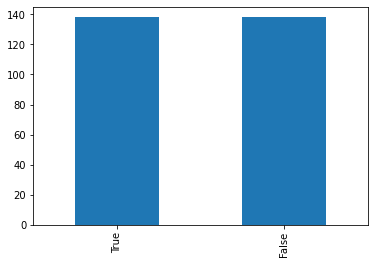

In [1249]:
training_label.value_counts().plot.bar()

In [1250]:
from sklearn import tree
#clf = tree.DecisionTreeClassifier(max_depth=10,min_samples_leaf=2,min_impurity_decrease=0.1, class_weight = "balanced")
clf = tree.DecisionTreeClassifier()
clf.fit(training_data, training_label)
test_pred_tree =  clf.predict(test_data)

In [1251]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label, test_pred_tree)

0.9625

In [1252]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators=100,max_depth=)
model.fit(training_data, training_label)

RandomForestClassifier(max_depth=7)

In [1253]:
test_pred =  model.predict(test_data)

In [1254]:
from sklearn.metrics import accuracy_score

accuracy_score(test_label, test_pred)

0.9875

In [1281]:
features = pd.DataFrame({'feature':training_data.columns,'importance':np.round(model.feature_importances_,3)})
features = features.sort_values('importance',ascending=False)
features

,feature,importance
0,Total,0.299
4,Sp. Atk,0.131
1,HP,0.129
6,Speed,0.122
5,Sp. Def,0.102
2,Attack,0.068
3,Defense,0.050
37,Type 2_None,0.021
24,Type 1_Water,0.014
16,Type 1_Grass,0.010


In [1282]:
features = features.set_index('feature')

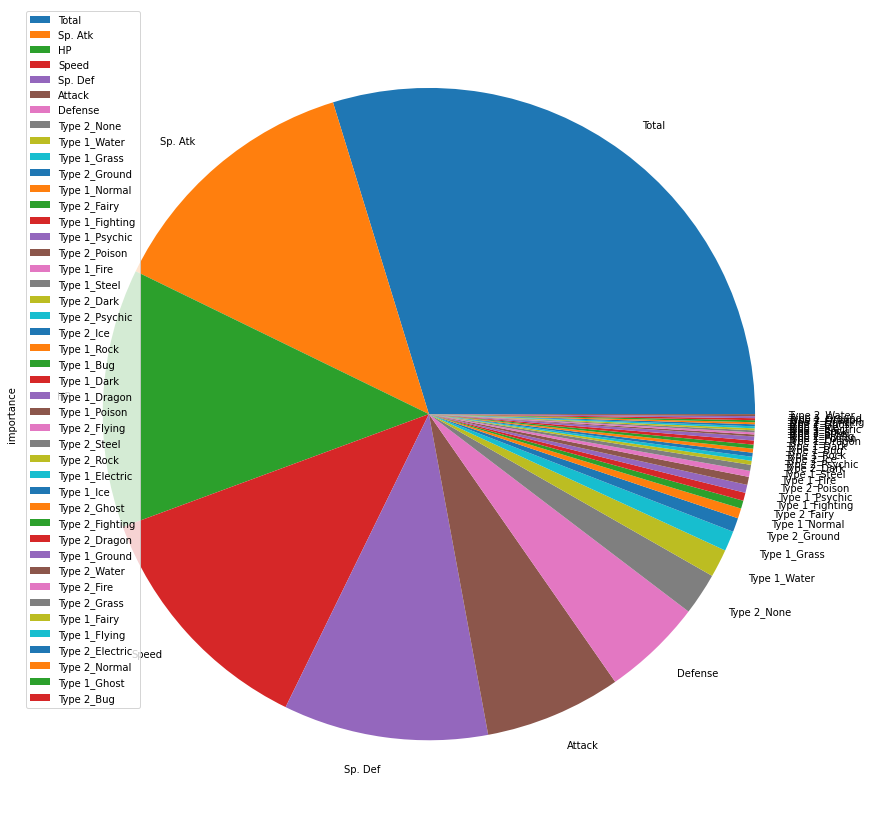

In [1283]:
plot = features.plot.pie(y='importance', figsize=(15, 15))